# IMPORT DATA

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
data_gedung=pd.read_csv("Documents/datmin/building_metadata.csv")

In [3]:
data_energy=pd.read_csv("Documents/datmin/train.csv")

In [4]:
data_cuaca=pd.read_csv("Documents/datmin/weather_train.csv")

In [5]:
data_gedung.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [6]:
data_energy.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [7]:
data_cuaca.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [8]:
data_gedung.shape

(1449, 6)

In [9]:
data_energy.shape

(20216100, 4)

In [10]:
data_cuaca.shape

(139773, 9)

# Preprocessing

# Penanganan Missing Values pada Data Gedung

In [11]:
#Menghitung jumlah missing value di setiap kolom
print(data_gedung)
print(data_gedung.isnull().sum())
print(data_gedung.isnull().sum().sum())

      site_id  building_id                    primary_use  square_feet  \
0           0            0                      Education         7432   
1           0            1                      Education         2720   
2           0            2                      Education         5376   
3           0            3                      Education        23685   
4           0            4                      Education       116607   
...       ...          ...                            ...          ...   
1444       15         1444  Entertainment/public assembly        19619   
1445       15         1445                      Education         4298   
1446       15         1446  Entertainment/public assembly        11265   
1447       15         1447            Lodging/residential        29775   
1448       15         1448                         Office        92271   

      year_built  floor_count  
0         2008.0          NaN  
1         2004.0          NaN  
2         1991.

Terlihat bahwa year_built dan floor_count memiliki missing values masing-masing sebanyak 774 dan 1094, di mana terdapat lebih dari 50% dari jumlah data (baris) sehingga kolom year_built dan floor_count dihapus

In [12]:
#menghapus data year_built dan floor_count karena missing value lebih dari 50%
data_gedung.drop("year_built", axis=1, inplace=True)
data_gedung.drop("floor_count", axis=1, inplace=True)
data_gedung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   site_id      1449 non-null   int64 
 1   building_id  1449 non-null   int64 
 2   primary_use  1449 non-null   object
 3   square_feet  1449 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.4+ KB


Terlihat bahwa tipe site_id dan primary_use masih belum sesuai dengan yang seharusnya sehingga perlu dilakukan koreksi

In [13]:
# mengoreksi tipe variabel site_id dan primary_use sebagai kategori
data_gedung['site_id'] = data_gedung['site_id'].astype('category')
data_gedung['primary_use'] = data_gedung['primary_use'].astype('category')
data_gedung.dtypes

site_id        category
building_id       int64
primary_use    category
square_feet       int64
dtype: object

In [14]:
#mengecek apakah terdapat ada duplikasi data
print(data_gedung.shape)
data_gedung.duplicated().sum()

(1449, 4)


0

# Missing Values pada Data Energy

In [15]:
#Menghitung jumlah missing value di setiap kolom
print(data_energy)
print(data_energy.isnull().sum())
print(data_energy.isnull().sum().sum())

          building_id  meter            timestamp  meter_reading
0                   0      0  2016-01-01 00:00:00          0.000
1                   1      0  2016-01-01 00:00:00          0.000
2                   2      0  2016-01-01 00:00:00          0.000
3                   3      0  2016-01-01 00:00:00          0.000
4                   4      0  2016-01-01 00:00:00          0.000
...               ...    ...                  ...            ...
20216095         1444      0  2016-12-31 23:00:00          8.750
20216096         1445      0  2016-12-31 23:00:00          4.825
20216097         1446      0  2016-12-31 23:00:00          0.000
20216098         1447      0  2016-12-31 23:00:00        159.575
20216099         1448      0  2016-12-31 23:00:00          2.850

[20216100 rows x 4 columns]
building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64
0


In [16]:
data_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


Terlihat bahwa tipe meter dan timestamp masih belum sesuai dengan yang seharusnya sehingga perlu dilakukan koreksi

In [17]:
#mengoreksi tipe variabel timestamp dari string menjadi datetime
data_energy['timestamp']= pd.to_datetime(data_energy['timestamp'])
#mengoreksi tipe variabel meter menjadi kategori
data_energy['meter'] = data_energy['meter'].astype('category')

data_energy.dtypes

building_id               int64
meter                  category
timestamp        datetime64[ns]
meter_reading           float64
dtype: object

In [18]:
#mengecek apakah terdapat ada duplikasi data
print(data_energy.shape)
data_energy.duplicated().sum()

(20216100, 4)


0

# Penanganan Missing Values pada Data Cuaca

Berikutnya akan dilakukan penanganan missing values dengan salah satu cara berikut:
1. menghapus kolom yang memiliki missing values hampir atau lebih dari 50%
2. melakukan imputasi dengan mean/median tergantung dari distribusi variabel tersebut (mean untuk yang kurang lebih berdistribusi normal dan median untuk skewed distribution)

In [19]:
#Menghitung jumlah missing value di setiap kolom
print(data_cuaca)
print(data_cuaca.isnull().sum())
print(data_cuaca.isnull().sum().sum())

        site_id            timestamp  air_temperature  cloud_coverage  \
0             0  2016-01-01 00:00:00             25.0             6.0   
1             0  2016-01-01 01:00:00             24.4             NaN   
2             0  2016-01-01 02:00:00             22.8             2.0   
3             0  2016-01-01 03:00:00             21.1             2.0   
4             0  2016-01-01 04:00:00             20.0             2.0   
...         ...                  ...              ...             ...   
139768       15  2016-12-31 19:00:00              3.0             NaN   
139769       15  2016-12-31 20:00:00              2.8             2.0   
139770       15  2016-12-31 21:00:00              2.8             NaN   
139771       15  2016-12-31 22:00:00              2.2             NaN   
139772       15  2016-12-31 23:00:00              1.7             NaN   

        dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0                  20.0                NaN              1

Terlihat bahwa cloud_coverage memiliki missing values sebanyak 69173, di mana terdapat mendekati 50% dari jumlah data (baris) sehingga kolom cloud_coverage dihapus

In [20]:
#hapus cloud coverage karena MV nyaris 50%
data_cuaca.drop("cloud_coverage", axis=1, inplace=True)

In [21]:
data_cuaca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   dew_temperature     139660 non-null  float64
 4   precip_depth_1_hr   89484 non-null   float64
 5   sea_level_pressure  129155 non-null  float64
 6   wind_direction      133505 non-null  float64
 7   wind_speed          139469 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.5+ MB


Terlihat bahwa tipe site_id dan timestamp masih belum sesuai dengan yang seharusnya sehingga perlu dilakukan koreksi

In [22]:
#mengoreksi tipe variabel timestamp dari string menjadi datetime
data_cuaca['timestamp']= pd.to_datetime(data_cuaca['timestamp'])
#mengoreksi tipe variabel site id menjadi kategori
data_cuaca['site_id'] = data_cuaca['site_id'].astype('category')

data_cuaca.dtypes

site_id                     category
timestamp             datetime64[ns]
air_temperature              float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
dtype: object

count    139718.000000
mean         14.418106
std          10.626595
min         -28.900000
25%           7.200000
50%          15.000000
75%          22.200000
max          47.200000
Name: air_temperature, dtype: float64


<AxesSubplot:>

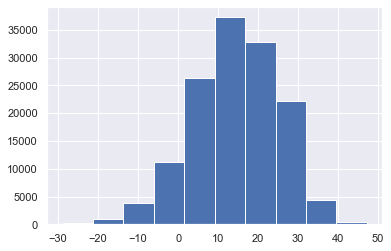

In [23]:
# Melihat distribusi data untuk air temperature
print(data_cuaca['air_temperature'].describe())
data_cuaca['air_temperature'].hist()

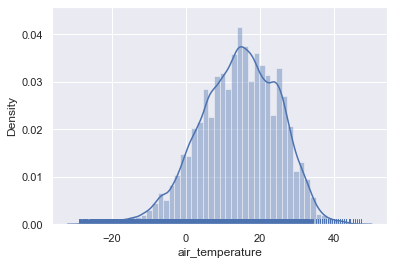

In [24]:
p = sns.distplot(data_cuaca['air_temperature'], kde=True, rug=True)

Dilakukan imputasi menggunakan median

In [25]:
# Imputasi missing values air_temperature dengan median
data_cuaca['air_temperature'] = data_cuaca['air_temperature'].replace(np.nan, 15)

count    89484.000000
mean         0.983047
std          8.463678
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        343.000000
Name: precip_depth_1_hr, dtype: float64


<AxesSubplot:>

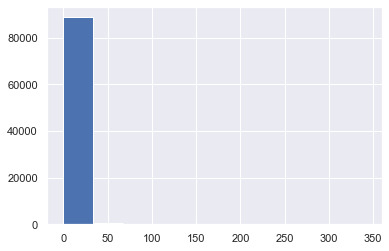

In [26]:
# Melihat data untuk precip depth
print(data_cuaca['precip_depth_1_hr'].describe())
data_cuaca['precip_depth_1_hr'].hist()

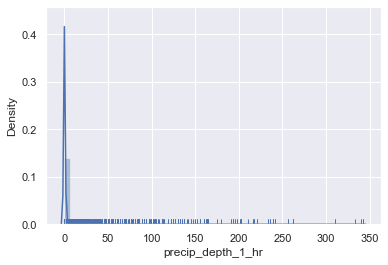

In [27]:
p = sns.distplot(data_cuaca['precip_depth_1_hr'], kde=True, rug=True)

Dilakukan imputasi dengan mean

In [28]:
#membuat kolom baru bernama hours yang berisi jam pengamatan
data_cuaca["hours"] = data_cuaca["timestamp"].dt.hour

#melihat median dari masing-masing data berdasarkan jam pengamatan
data_cuaca.groupby(["hours"]).mean()

,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
hours,,,,,,
0,15.777526,7.103690,1.206971,1015.566358,191.099893,3.775352
1,14.985989,7.204729,1.549368,1015.777885,184.840865,3.529468
2,14.246528,7.249811,0.931183,1015.970562,179.961538,3.379722
3,13.630706,7.312818,0.880882,1016.131645,177.488104,3.191231
4,13.143577,7.382527,0.902991,1016.188532,176.859996,3.105524
5,12.712285,7.373145,0.661634,1016.220893,175.702741,3.021792
6,12.373056,7.364871,0.885768,1016.136711,174.530150,3.005597
7,12.161236,7.394690,0.810377,1016.080880,173.282766,2.984997
8,11.950507,7.350654,0.723490,1015.990906,171.604873,3.005113


In [29]:
dasuho0= data_cuaca[data_cuaca["hours"]==0]
dasuho1= data_cuaca[data_cuaca["hours"]==1]
dasuho2= data_cuaca[data_cuaca["hours"]==2]
dasuho3= data_cuaca[data_cuaca["hours"]==3]
dasuho4= data_cuaca[data_cuaca["hours"]==4]
dasuho5= data_cuaca[data_cuaca["hours"]==5]
dasuho6= data_cuaca[data_cuaca["hours"]==6]
dasuho7= data_cuaca[data_cuaca["hours"]==7]
dasuho8= data_cuaca[data_cuaca["hours"]==8]
dasuho9= data_cuaca[data_cuaca["hours"]==9]
dasuho10= data_cuaca[data_cuaca["hours"]==10]
dasuho11= data_cuaca[data_cuaca["hours"]==11]
dasuho12= data_cuaca[data_cuaca["hours"]==12]
dasuho13= data_cuaca[data_cuaca["hours"]==13]
dasuho14= data_cuaca[data_cuaca["hours"]==14]
dasuho15= data_cuaca[data_cuaca["hours"]==15]
dasuho16= data_cuaca[data_cuaca["hours"]==16]
dasuho17= data_cuaca[data_cuaca["hours"]==17]
dasuho18= data_cuaca[data_cuaca["hours"]==18]
dasuho19= data_cuaca[data_cuaca["hours"]==19]
dasuho20= data_cuaca[data_cuaca["hours"]==20]
dasuho21= data_cuaca[data_cuaca["hours"]==21]
dasuho22= data_cuaca[data_cuaca["hours"]==22]
dasuho23= data_cuaca[data_cuaca["hours"]==23]

In [30]:
dasuho0['precip_depth_1_hr']= dasuho0['precip_depth_1_hr'].replace(np.nan,1.2)
dasuho1['precip_depth_1_hr']= dasuho1['precip_depth_1_hr'].replace(np.nan,1.5)
dasuho2['precip_depth_1_hr']= dasuho2['precip_depth_1_hr'].replace(np.nan,0.9)
dasuho3['precip_depth_1_hr']= dasuho3['precip_depth_1_hr'].replace(np.nan,0.9)
dasuho4['precip_depth_1_hr']= dasuho4['precip_depth_1_hr'].replace(np.nan,0.9)
dasuho5['precip_depth_1_hr']= dasuho5['precip_depth_1_hr'].replace(np.nan,0.7)
dasuho6['precip_depth_1_hr']= dasuho6['precip_depth_1_hr'].replace(np.nan,0.9)
dasuho7['precip_depth_1_hr']= dasuho7['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho8['precip_depth_1_hr']= dasuho8['precip_depth_1_hr'].replace(np.nan,0.7)
dasuho9['precip_depth_1_hr']= dasuho9['precip_depth_1_hr'].replace(np.nan,0.7)
dasuho10['precip_depth_1_hr']= dasuho10['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho11['precip_depth_1_hr']= dasuho11['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho12['precip_depth_1_hr']= dasuho12['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho13['precip_depth_1_hr']= dasuho13['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho14['precip_depth_1_hr']= dasuho14['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho15['precip_depth_1_hr']= dasuho15['precip_depth_1_hr'].replace(np.nan,0.9)
dasuho16['precip_depth_1_hr']= dasuho16['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho17['precip_depth_1_hr']= dasuho17['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho18['precip_depth_1_hr']= dasuho18['precip_depth_1_hr'].replace(np.nan,0.8)
dasuho19['precip_depth_1_hr']= dasuho19['precip_depth_1_hr'].replace(np.nan,1.2)
dasuho20['precip_depth_1_hr']= dasuho20['precip_depth_1_hr'].replace(np.nan,1.3)
dasuho21['precip_depth_1_hr']= dasuho21['precip_depth_1_hr'].replace(np.nan,1.3)
dasuho22['precip_depth_1_hr']= dasuho22['precip_depth_1_hr'].replace(np.nan,1.6)
dasuho23['precip_depth_1_hr']= dasuho23['precip_depth_1_hr'].replace(np.nan,1.3)
data_cuaca = pd.concat([dasuho0,dasuho1,dasuho2
                        ,dasuho3,dasuho4,dasuho5
                        ,dasuho6,dasuho7,dasuho8
                        ,dasuho9,dasuho10,dasuho11
                        ,dasuho12,dasuho13,dasuho14
                        ,dasuho15,dasuho16,dasuho17
                        ,dasuho18,dasuho19,dasuho20
                        ,dasuho21,dasuho22,dasuho23])

In [31]:
data_cuaca=data_cuaca.sort_index()

In [32]:
data_cuaca.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hours
0,0,2016-01-01 00:00:00,25.0,20.0,1.2,1019.7,0.0,0.0,0
1,0,2016-01-01 01:00:00,24.4,21.1,-1.0,1020.2,70.0,1.5,1
2,0,2016-01-01 02:00:00,22.8,21.1,0.0,1020.2,0.0,0.0,2
3,0,2016-01-01 03:00:00,21.1,20.6,0.0,1020.1,0.0,0.0,3
4,0,2016-01-01 04:00:00,20.0,20.0,-1.0,1020.0,250.0,2.6,4


count    139660.000000
mean          7.350158
std           9.790235
min         -35.000000
25%           0.600000
50%           8.300000
75%          14.400000
max          26.100000
Name: dew_temperature, dtype: float64


<AxesSubplot:>

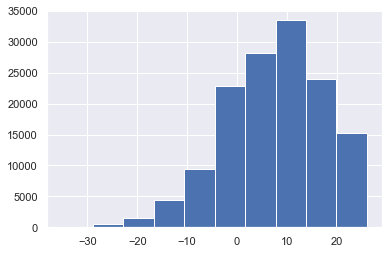

In [33]:
# Melihat data untuk dew temperature
print(data_cuaca['dew_temperature'].describe())
data_cuaca['dew_temperature'].hist()

Terlihat karena distribusi data skewed sehingga imputasi yang dilakukan adalah menggunakan median

In [34]:
# Imputasi missing values dew temperature dengan median
data_cuaca['dew_temperature'] = data_cuaca['dew_temperature'].replace(np.nan, 8.3)

count    129155.000000
mean       1016.158038
std           7.629684
min         968.200000
25%        1011.800000
50%        1016.400000
75%        1020.800000
max        1045.500000
Name: sea_level_pressure, dtype: float64


<AxesSubplot:>

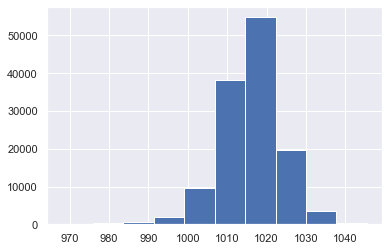

In [35]:
# Melihat distribusi data untuk sea_level_pressure
print(data_cuaca['sea_level_pressure'].describe())
data_cuaca['sea_level_pressure'].hist()

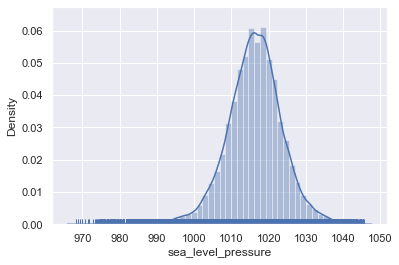

In [36]:
p = sns.distplot(data_cuaca['sea_level_pressure'], kde=True, rug=True)

Karena data terlihat cukup berdistribusi normal maka imputasi dilakukan dengan mean

In [37]:
# Memasukan missing values sea level pressure dengan mean
data_cuaca['sea_level_pressure'] = data_cuaca['sea_level_pressure'].replace(np.nan, 1016.158038)

Dilakukan imputasi data pada kolom wind_direction dengan mean berdasarkan site_id

In [38]:
data_cuaca.groupby('site_id').mean()

,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hours
site_id,,,,,,,
0,22.833345,16.814970,1.382536,1017.970666,156.494024,3.375114,11.500000
1,11.712176,7.646548,0.966621,1015.990793,195.584475,3.967043,11.498688
2,24.939189,4.069987,0.163623,1011.701748,152.777100,2.932764,11.498918
3,15.520342,8.126333,0.692654,1017.906648,185.063174,3.910893,11.503531
4,15.236366,9.894387,0.355550,1016.881685,207.864715,3.858226,11.501309
5,10.868875,8.194700,0.966545,1016.158038,200.053191,4.768087,11.499829
6,15.141517,7.321806,0.797768,1017.500656,131.618143,2.197758,11.501025
7,7.888867,1.922986,1.848352,1015.252852,208.931739,3.445565,11.482238
8,22.833345,16.814970,1.382536,1017.970666,156.494024,3.375114,11.500000


In [39]:
#mengisi missing value wind direction dengan mean berdasarkan site_id
dasusite0= data_cuaca[data_cuaca["site_id"]==0]
dasusite1= data_cuaca[data_cuaca["site_id"]==1]
dasusite2= data_cuaca[data_cuaca["site_id"]==2]
dasusite3= data_cuaca[data_cuaca["site_id"]==3]
dasusite4= data_cuaca[data_cuaca["site_id"]==4]
dasusite5= data_cuaca[data_cuaca["site_id"]==5]
dasusite6= data_cuaca[data_cuaca["site_id"]==6]
dasusite7= data_cuaca[data_cuaca["site_id"]==7]
dasusite8= data_cuaca[data_cuaca["site_id"]==8]
dasusite9= data_cuaca[data_cuaca["site_id"]==9]
dasusite10= data_cuaca[data_cuaca["site_id"]==10]
dasusite11= data_cuaca[data_cuaca["site_id"]==11]
dasusite12= data_cuaca[data_cuaca["site_id"]==12]
dasusite13= data_cuaca[data_cuaca["site_id"]==13]
dasusite14= data_cuaca[data_cuaca["site_id"]==14]
dasusite15= data_cuaca[data_cuaca["site_id"]==15]

In [40]:
dasusite0['wind_direction']= dasusite0['wind_direction'].replace(np.nan,156.0)
dasusite1['wind_direction']= dasusite1['wind_direction'].replace(np.nan,196.0)
dasusite2['wind_direction']= dasusite2['wind_direction'].replace(np.nan,153.0)
dasusite3['wind_direction']= dasusite3['wind_direction'].replace(np.nan,185.0)
dasusite4['wind_direction']= dasusite4['wind_direction'].replace(np.nan,208.0)
dasusite5['wind_direction']= dasusite5['wind_direction'].replace(np.nan,200.0)
dasusite6['wind_direction']= dasusite6['wind_direction'].replace(np.nan,132.0)
dasusite7['wind_direction']= dasusite7['wind_direction'].replace(np.nan,209.0)
dasusite8['wind_direction']= dasusite8['wind_direction'].replace(np.nan,156.0)
dasusite9['wind_direction']= dasusite9['wind_direction'].replace(np.nan,117.0)
dasusite10['wind_direction']= dasusite10['wind_direction'].replace(np.nan,180.0)
dasusite11['wind_direction']= dasusite11['wind_direction'].replace(np.nan,209.0)
dasusite12['wind_direction']= dasusite12['wind_direction'].replace(np.nan,203.0)
dasusite13['wind_direction']= dasusite13['wind_direction'].replace(np.nan,188.0)
dasusite14['wind_direction']= dasusite14['wind_direction'].replace(np.nan,188.0)
dasusite15['wind_direction']= dasusite15['wind_direction'].replace(np.nan,187.0)
data_cuaca = pd.concat([dasusite0,dasusite1,dasusite2
                        ,dasusite3,dasusite4,dasusite5
                        ,dasusite6,dasusite7,dasusite8
                        ,dasusite9,dasusite10,dasusite11
                        ,dasusite12,dasusite13,dasusite14
                        ,dasusite15])

In [41]:
data_cuaca=data_cuaca.sort_index()

In [42]:
data_cuaca.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hours
0,0,2016-01-01 00:00:00,25.0,20.0,1.2,1019.7,0.0,0.0,0
1,0,2016-01-01 01:00:00,24.4,21.1,-1.0,1020.2,70.0,1.5,1
2,0,2016-01-01 02:00:00,22.8,21.1,0.0,1020.2,0.0,0.0,2
3,0,2016-01-01 03:00:00,21.1,20.6,0.0,1020.1,0.0,0.0,3
4,0,2016-01-01 04:00:00,20.0,20.0,-1.0,1020.0,250.0,2.6,4


count    139469.000000
mean          3.560527
std           2.335874
min           0.000000
25%           2.100000
50%           3.100000
75%           5.000000
max          19.000000
Name: wind_speed, dtype: float64


<AxesSubplot:>

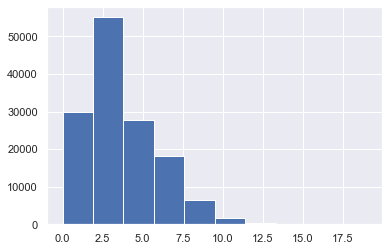

In [43]:
# Melihat data untuk wind speed
print(data_cuaca['wind_speed'].describe())
data_cuaca['wind_speed'].hist()

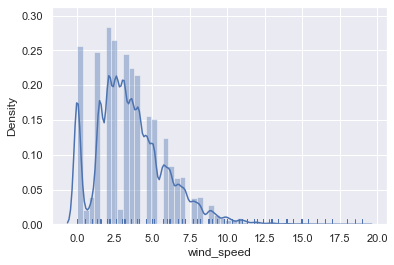

In [44]:
p = sns.distplot(data_cuaca['wind_speed'], kde=True, rug=True)

Karena terlihat bahwa distribusi skewed sehingga imputasi dilakukan dengan median

In [45]:
# Memasukan missing data sea level pressure berdasarkan median
data_cuaca['wind_speed'] = data_cuaca['wind_speed'].replace(np.nan, 3.1)

In [46]:
data_cuaca.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hours
0,0,2016-01-01 00:00:00,25.0,20.0,1.2,1019.7,0.0,0.0,0
1,0,2016-01-01 01:00:00,24.4,21.1,-1.0,1020.2,70.0,1.5,1
2,0,2016-01-01 02:00:00,22.8,21.1,0.0,1020.2,0.0,0.0,2
3,0,2016-01-01 03:00:00,21.1,20.6,0.0,1020.1,0.0,0.0,3
4,0,2016-01-01 04:00:00,20.0,20.0,-1.0,1020.0,250.0,2.6,4


In [47]:
#mengecek apa masih ada missing values
data_cuaca.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
hours                 0
dtype: int64

In [48]:
#mengecek apakah terdapat ada duplikasi data
print(data_cuaca.shape)
data_cuaca.duplicated().sum()

(139773, 9)


0

# Merge Data

Sebelum melakukan exploratory data analysis antara variabel, akan digabungkan ketiga data terlebih dahulu

In [50]:
import gc

In [51]:
data_energy = data_energy.merge(data_gedung, on='building_id', how='left')
all_data = data_energy.merge(data_cuaca, on=['site_id','timestamp'], how='left')

del data_gedung,data_cuaca,data_energy
gc.collect()

282420

In [52]:
all_data.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hours
0,0,0,2016-01-01,0.0,0,Education,7432,25.0,20.0,1.2,1019.7,0.0,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,25.0,20.0,1.2,1019.7,0.0,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,25.0,20.0,1.2,1019.7,0.0,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,25.0,20.0,1.2,1019.7,0.0,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,25.0,20.0,1.2,1019.7,0.0,0.0,0.0


In [53]:
all_data.shape

(20216100, 14)

Karena data_building hanya merupakan id, maka variabel building_id dihapus

# Deteksi Outlier

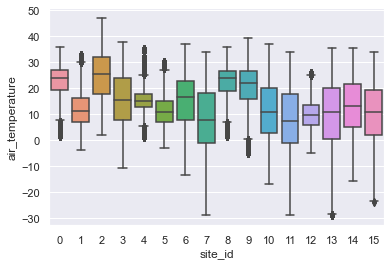

In [54]:
# BoxPlots
p = sns.boxplot(x="site_id", y="air_temperature", data=all_data)
# 2, 3, 6, 7, 10, 11, 14 tidak memiliki outlier

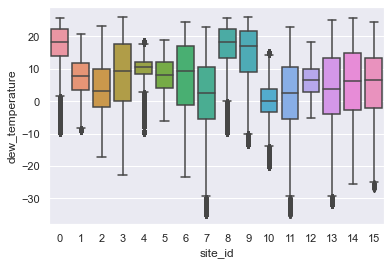

In [55]:
# BoxPlots
p = sns.boxplot(x="site_id", y="dew_temperature", data=all_data)
#site 2, 3, 5, 6, 12, 14 tidak memiliki outlier

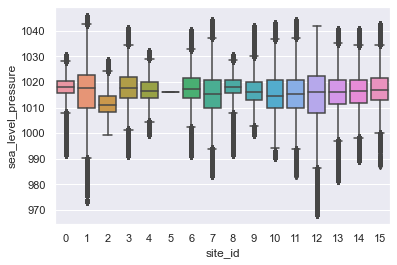

In [56]:
# BoxPlots
p = sns.boxplot(x="site_id", y="sea_level_pressure", data=all_data)

semua data sea level pressure site 5 kosong (missing value) sehingga setelah diimputasi data menjadi tidak beragam
dan pada boxplot tidak terplot

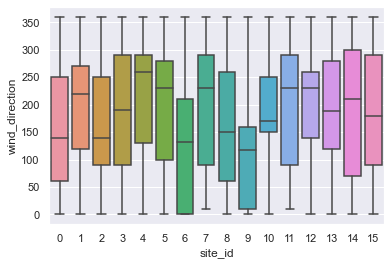

In [57]:
# BoxPlots
p = sns.boxplot(x="site_id", y="wind_direction", data=all_data)
#tidak ada outlier

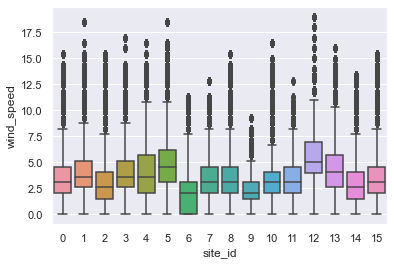

In [58]:
# BoxPlots
p = sns.boxplot(x="site_id", y="wind_speed", data=all_data)
#outlier di semua site

Dari penyajian box plot didapatkan beberapa informasi, yaitu:
1. pada site 5, tidak terdapat data untuk sea level pressure, sehingga ketika sebelumnya telah diimputasi, pada boxplot tidak terbentuk plot untuk site 5.
2. Untuk wind direction, tidak ada gedung yang memiliki wind direction yang berbeda secara ekstrim
3. Untuk wind speed, terlihat bahwa terdapat cukup banyak outlier pada masing-masing site di atas batas atas nilai ekstrim, sehingga diasumsikan terdapat faktor-faktor eksternal yang menyebabkan terdapat outlier.

# Exploratory Data Analysis

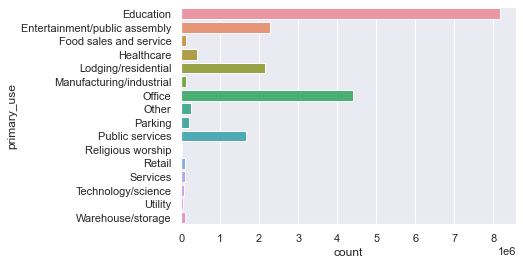

In [59]:
#Gedung paling banyak digunakan untuk apa?
p = sns.countplot(y="primary_use", data=all_data)

Dari grafik di atas, terlihat bahwa kebanyakan gedung dipergunakan untuk edukasi sedangkan paling sedikit digunakan untuk religious worship

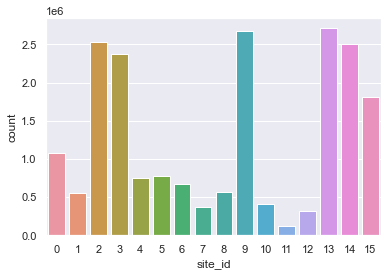

In [69]:
# Paling banyak lokasi dimana
p = sns.countplot(x="site_id", data=all_data)

Dari grafik di atas kemudian bisa diketahui informasi bahwa paling banyak terdapat gedung di site 13, kemudian ingin diketahui lebih lanjut site mana yang rata-rata memakai energi terbesar

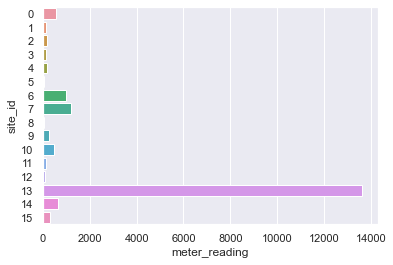

In [97]:
#mencari site yang menggunakan energi terbesar
use = all_data.groupby("site_id").meter_reading.mean()
sns.barplot(y=use.index,x=use)
del use

Dari grafik di atas diketahui bahwa site 13 merupakan site yang menggunakan energi terbesar. Terlihat bahwa site yang memiliki gedung terbanyak merupakan site yang menggunakan energi terbesar.

Kemudian ingin diketahui lebih lanjut primary_use mana yang memiliki gedung terbanyak di site 13

<AxesSubplot:xlabel='count', ylabel='primary_use'>

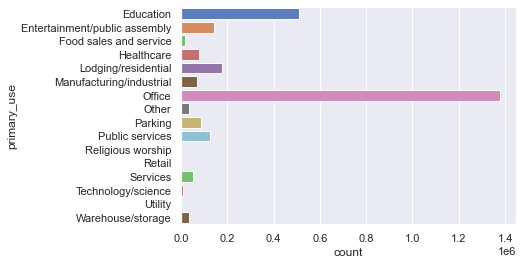

In [74]:
#mencari primary_use terbanyak di site 13
sns.countplot(y="primary_use",palette = 'muted',data=site_tigabelas)

Dari grafik di atas, terlihat bahwa pada site 13, paling banyak terdapat gedung perkantoran

In [61]:
all_data.groupby(["primary_use", "site_id"]).size().unstack()

site_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
primary_use,,,,,,,,,,,,,,,,
Education,345329,263493,1261874,788160,557399,430416,254430,366681,0,1499603,240503,119459,175669,509121,666397,686970
Entertainment/public assembly,43564,8784,324352,385920,62187,158112,54616,0,196201,385165,43371,0,17284,140210,218660,226491
Food sales and service,0,0,43909,0,0,0,0,0,0,0,0,0,0,17568,52613,0
Healthcare,0,0,17545,52621,0,8784,0,0,0,0,0,0,0,78878,233367,7332
Lodging/residential,263621,87840,289046,96361,29673,8784,184113,0,0,391129,26305,0,0,175383,216220,377938
Manufacturing/industrial,0,0,0,0,0,26352,0,0,0,0,0,0,0,70272,0,29089
Office,246264,158109,409250,200179,0,96624,158712,0,55674,306988,37351,0,79042,1377800,930253,338618
Other,47654,0,0,35074,0,8784,0,0,71941,0,43633,0,0,35136,0,0
Parking,70272,0,26345,8782,20589,0,0,0,0,0,0,0,0,87808,0,0


In [73]:
site_tigabelas=all_data[all_data["site_id"]==13]
site_tigabelas.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hours,weekday
1470,1069,0,2016-01-01,3.5000,13,Office,20864,-8.3,-12.2,1.2,1023.3,250.0,4.1,0.0,4
1471,1070,0,2016-01-01,75.0000,13,Lodging/residential,230747,-8.3,-12.2,1.2,1023.3,250.0,4.1,0.0,4
1472,1070,1,2016-01-01,48.9804,13,Lodging/residential,230747,-8.3,-12.2,1.2,1023.3,250.0,4.1,0.0,4
1473,1071,0,2016-01-01,7.9280,13,Office,10385,-8.3,-12.2,1.2,1023.3,250.0,4.1,0.0,4
1474,1072,1,2016-01-01,0.0000,13,Healthcare,305000,-8.3,-12.2,1.2,1023.3,250.0,4.1,0.0,4


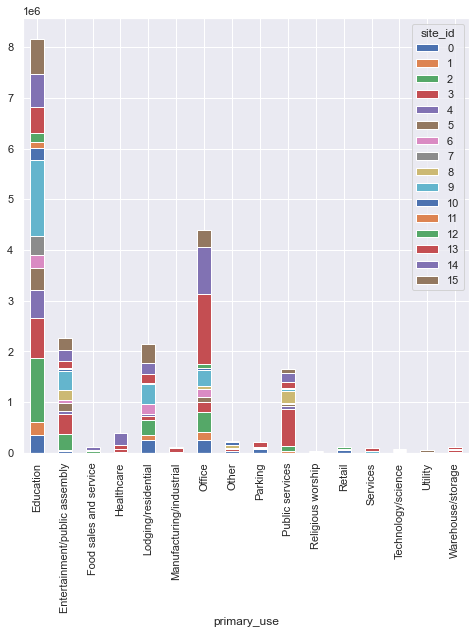

In [62]:
CT = pd.crosstab(index=all_data["primary_use"], columns=all_data["site_id"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Dari stacked bar di atas, terlihat beberapa informasi yang jelas, seperti
1. Gedung edukasi paling banyak terdapat di site 9
2. Gedung lodging/residential paling banyak terdapat di site 9
3. Gedung perkantoran paling banyak terdapat di site 13 (sama seperti informasi yang telah didapat sebelumnya)
4. Gedung Public Service paling banyak terdapat di site 3

<AxesSubplot:>

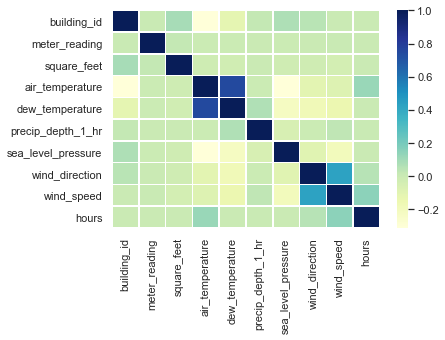

In [63]:
#membuat heatmap untuk melihat korelasi
sns.heatmap(all_data.corr(),linewidths=.5,cmap="YlGnBu")

terlihat korelasi yang kuat antara air_temperature dan dew_temperature

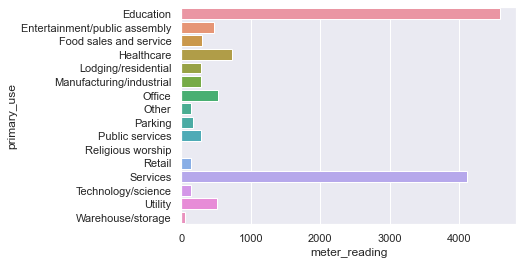

In [65]:
#mencari primary use yang menggunakan energi terbesar
use = all_data.groupby("primary_use").meter_reading.mean()
sns.barplot(y=use.index,x=use)
del use

Dari grafik di atas terlihat bahwa gedung yang rata-rata memakai energi paling banyak adalah gedung edukasi sedangkan gedung yang rata-rata paling sedikit memakai energi adalah gedung religious worship

Kemudian ingin pula diketahui pada hari apa penggunaan energi paling banyak dilakukan

In [66]:
all_data["weekday"] = all_data["timestamp"].dt.weekday

In [67]:
all_data.groupby(["weekday"]).mean()

,building_id,meter_reading,square_feet,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hours
weekday,,,,,,,,,,
0,799.116087,1967.816997,107798.345901,15.896304,7.489983,0.716252,1016.051946,171.706642,3.429302,11.521188
1,798.944530,2267.786315,107706.870647,16.114024,7.831028,0.877108,1016.106574,171.168793,3.421611,11.504265
2,799.807383,2485.819959,107764.171327,16.095390,7.892220,0.928945,1016.271891,168.245485,3.270071,11.521542
3,799.560309,2263.206170,107784.725875,16.250627,8.131090,0.901451,1015.896937,165.357370,3.300354,11.494975
4,799.270912,2151.439219,107779.363035,15.947902,7.717368,0.794470,1015.985003,172.329164,3.393591,11.514283
5,799.259311,1865.434390,107784.222002,15.713256,7.641393,0.720388,1016.163879,171.289154,3.376629,11.503367
6,798.986379,1820.957143,107863.446733,15.901280,7.531532,0.857848,1016.151934,175.087716,3.446076,11.521171


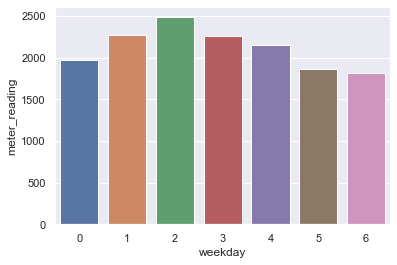

In [68]:
#mencari hari dengan penggunaan energi terbesar
use = all_data.groupby("weekday").meter_reading.mean()
sns.barplot(x=use.index,y=use)
del use

Dari grafik di atas, diketahui bahwa penggunaan energi paling banyak pada hari Rabu. 

Kemudian ingin pula dicari gedung dengan interval luas mana yang menggunakan energi terbesar

In [ ]:
max(all_data["square_feet"])

In [ ]:
min(all_data["square_feet"])

In [82]:
squarefeet_range = pd.cut(all_data.square_feet, bins=np.arange(0, 1000000, 100000))
square_meter_gabung = pd.concat([squarefeet_range,all_data.meter_reading],axis =1)
square_meter_gabung = pd.concat([square_meter_gabung,all_data.primary_use],axis =1)
ratarata = square_meter_gabung.groupby("square_feet").meter_reading.mean()
square_meter_gabung.dtypes

square_feet      category
meter_reading     float64
primary_use      category
dtype: object

<AxesSubplot:xlabel='meter_reading', ylabel='square_feet'>

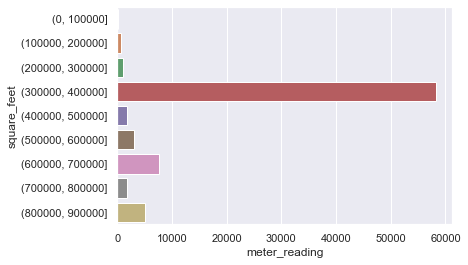

In [83]:
#mencari interval luas gedung dengan penggunaan energi terbesar
sns.barplot(y=ratarata.index,x=ratarata)

Dari grafik di atas diketahui bahwa rata-rata gedung yang paling banyak memakai energi adalah gedung yang mempunyai luas di antara 300000 sampai 400000 square feet. Didapatkan informasi bahwa semakin luas gedung belum berarti penggunaan energi semakin besar

Kemudian ingin diketahui lebih lanjut primary use apa yang gedungnya paling banyak seluas 300000 sampai 400000 square feet

In [94]:
luas_kaki=all_data[(all_data["square_feet"]>=300000) &(all_data["square_feet"]<=400000)]
luas_kaki.shape

(582664, 15)

<AxesSubplot:xlabel='count', ylabel='primary_use'>

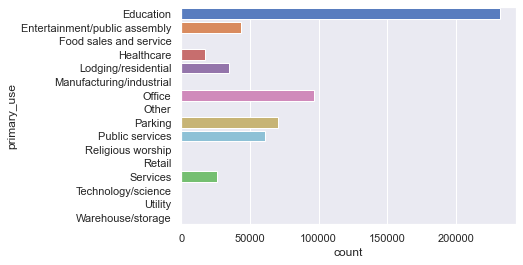

In [95]:
sns.countplot(y="primary_use",palette = 'muted',data=luas_kaki)

Dari grafik di atas terlihat bahwa gedung yang kebanyakan seluas 300000 sampai 400000 square feet adalah gedung edukasi

Sebelumnya telah didapat informasi bahwa site 13 merupakan site yang menggunakan energi terbesar dengan jumlah gedung terbanyak, dan gedungnya kebanyakan merupakan perkantoran. Meski site 13 menggunakan energi terbesar, perkantoran (yang merupakan gedung terbanyak di site tersebut) bukanlah gedung yang menggunakan energi terbesar.

Sebelumnya telah diketahui bahwa gedung paling banyak dipergunakan sebagai gedung edukasi, kemudian diketahui pula banyak gedung edukasi yang memiliki luas di interval 300000 sampai 400000 square feet, yang diketahui merupakan kelompok gedung yang paling banyak menggunakan energi, sehingga bisa dikatakan bahwa banyak gedung edukasi yang menggunakan energi besar